In [ ]:
import os
import pandas as pd
import numpy as np
import random
import datetime
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import seaborn as sb

In [133]:
# dados
diretorio = r'C:\Users\Computadores Gamer\OneDrive\Área de Trabalho\python'
diretorio = diretorio.replace('\\','/')
os.chdir(diretorio)
os.getcwd()
os.listdir()

dados = pd.read_csv('petr4.csv', sep=';', encoding='utf-8')
dados = pd.DataFrame(dados)
dados.head(5)


,Unnamed: 0,Date,Open,High,Low,Close,Adj.Close,Volume
0,1,2021-01-14,"29,17","29,67","28,719999","29,450001","23,936726",50745400
1,2,2021-01-15,"29,049999","29,08","28,030001","28,120001","22,855711",80673300
2,3,2021-01-18,"28,309999","28,85","28,01","28,07","22,815071",68855700
3,4,2021-01-19,"28,48","28,860001","27,639999","28,690001","23,319004",61656000
4,5,2021-01-20,"28,950001","29,120001","28,110001","28,209999","22,928862",60306200


In [136]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   indice     249 non-null    int64         
 1   data       249 non-null    datetime64[ns]
 2   open       249 non-null    object        
 3   high       249 non-null    object        
 4   low        249 non-null    object        
 5   close      249 non-null    object        
 6   adj.close  249 non-null    object        
 7   volume     249 non-null    int64         
 8   mes        249 non-null    int64         
 9   ano        249 non-null    int64         
 10  dia        249 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 21.5+ KB


In [135]:
dados.columns = ['indice','data','open','high','low','close','adj.close','volume']

dados['data'] = pd.to_datetime(dados['data'])
dados['mes'] = dados['data'].dt.month
dados['ano'] = dados['data'].dt.year
dados['dia'] = dados['data'].dt.day



In [ ]:
# dados['ano_mes'] = dados['mes'] + '/' + dados['ano']

# tirando indice e data, as outras colunas quero todas como float
# coluna para str
for i in range(2, 8):
    dados.iloc[:, i] = dados.iloc[:, i].astype(str)

# virgula para ponto
for i in range(2, 8):
    dados.iloc[:, i] = dados.iloc[:, i].str.replace(',', '.')

# converter para float
for i in range(2, 8):
    dados.iloc[:, i] = dados.iloc[:, i].astype(float)
    
dados.head(5)



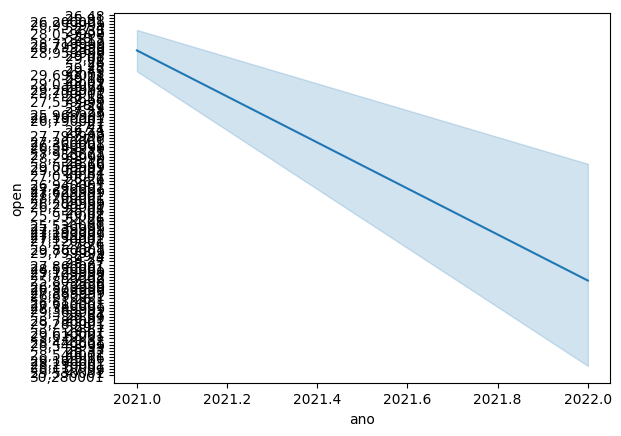

In [137]:
grafico1 = sb.lineplot(x = 'ano', y = 'open', data = dados)